1. Zamień sygnał na sumę sygnałów <b>(1 pkt)</b> np
```julia
x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
```

  Zaobserwuj wynik transformaty i wyjaśnij go.

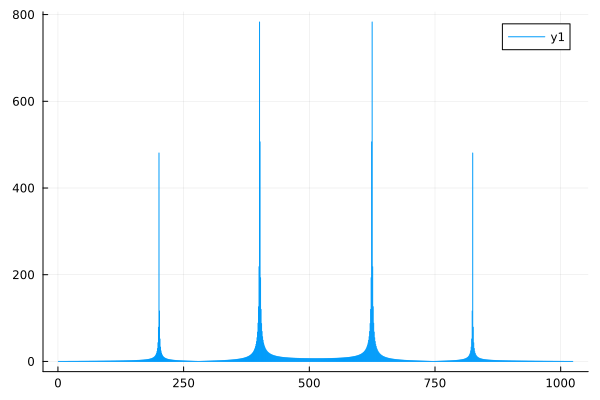

In [ ]:
# Wybieram częstotliwość próbkowania
Fs = 1024

# generuje wektor punktów czasowych w przedziale [0 1] co 1/Fs
t = 0:1/(Fs-1):1

x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400)

using Plots
plot(t,x)

y=fft(x)
sticks((abs.(y)))

2.  Usuwanie szumów <b>(1 pkt)</b> :

    1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
    2. Proszę narysować wykres zaszumionej funkcji.
    3. Narysować wykres transformaty Fouriera (widmo)  tego sygnału (jak poprzednio).
    4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
    5.Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla <b> częsci  rzeczywistej</b>. Porównać z wejściowym wykresem sygnału.

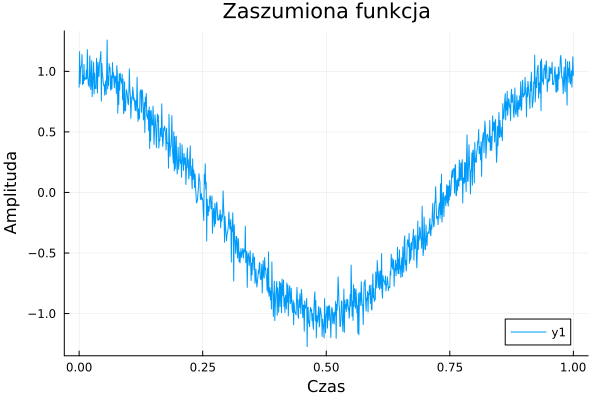

In [ ]:
using Plots, FFTW, Random

# Wybieram częstotliwość próbkowania
Fs = 1024

# Generuje wektor punktów czasowych w przedziale [0 1] co 1/Fs
t = 0:1/(Fs-1):1

# Tworzenie zaszumionej funkcji cosinus
x = cos.(2*pi*t) + randn(length(t))/10

# Wykres zaszumionej funkcji
plot(t, x, xlabel="Czas", ylabel="Amplituda", title="Zaszumiona funkcja")

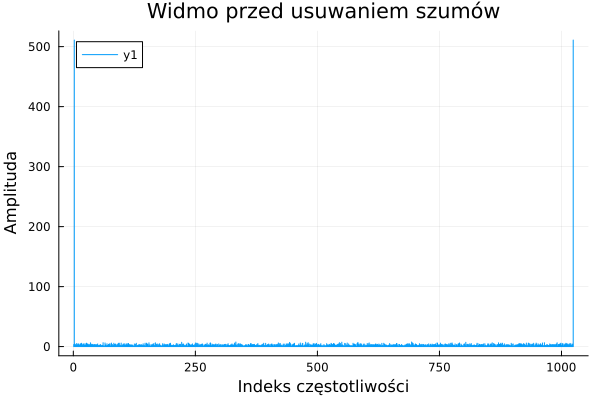

In [ ]:
# Obliczanie DFT
y = fft(x)

# Obliczanie widma amplitudowego
amplitude_spectrum = abs.(y)

# Wykres widma amplitudowego przed usuwaniem szumów
sticks(amplitude_spectrum, xlabel="Indeks częstotliwości", ylabel="Amplituda", title="Widmo przed usuwaniem szumów")

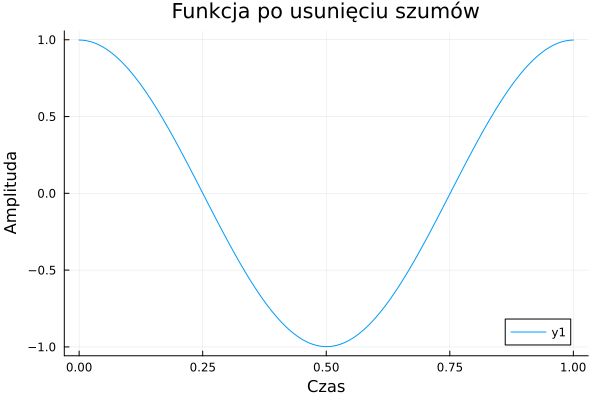

In [ ]:
# Usuwanie szumów w widmie
threshold = 50
amplitude_spectrum[abs.(amplitude_spectrum) .< threshold] .= 0

# Odwracanie transformaty
filtered_signal = ifft(amplitude_spectrum)

# Wykres funkcji po usunięciu szumów (część rzeczywista)
plot(t, real.(filtered_signal), xlabel="Czas", ylabel="Amplituda", title="Funkcja po usunięciu szumów")